# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
movies_raw = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

We will now explore the range of values of this dataset.  We can get a quick idea using the <b>info</b> and <b>describe</b> methods. 

In [4]:
# this will give us gross statistics on the numerically based columns.
movies_raw.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# this will give us information about how many records there are, what columns exist, and which are filled with nulls.
movies_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
movies_raw.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning

From the <b>info</b> method above, we can immediately get rid of any columns not relevant to the study or repetative.  In particular:

>homepage
>
>tagline
>
>keywords
>
>overview
>id & imdb_id
>
>budget and revenue (use the 2010 adjusted values, so drop these).

In [7]:
movies_raw.drop(labels=['homepage','tagline','keywords','overview','id','imdb_id','budget','revenue'],axis=1,inplace=True)

After dropping the above columns, let's convet the release date to an actual date, rather than a string.  We will break up the date from a string into columns for year, day and month.

In [8]:
date = movies_raw['release_date'].str.split('/',expand=True).rename(columns={0:'month',1:'day',2:'year'})
date

,month,day,year
0,6,9,15
1,5,13,15
2,3,18,15
3,12,15,15
4,4,1,15
...,...,...,...
10861,6,15,66
10862,12,21,66
10863,1,1,66
10864,11,2,66


We already have release year, so let's just get the day and month, put them into a seperate column, then remerge back into the dataframe.

In [9]:
cols=['day','month']
date[cols] = date[cols].applymap(np.int64)
date.drop(labels=['year'],axis = 1,inplace=True)

In [10]:
date.head(2)

,month,day
0,6,9
1,5,13


In [11]:
movies_raw = movies_raw.join([date])

From the <b>head</b> method we performed earlier, we could see that <i><b>cast</b></i>, <i><b>production companies</b></i>, and <i><b>genres</b></i> will need to be split apart, as multiple entires were put on a single entry.  The delimiter was a <b>|</b>.

Since they're stringe we will split them and use a lambda function to put each additional entry beyond the first into another seperated column.

In [12]:
cast = movies_raw['cast'].str.split('|',expand=True).rename(columns=lambda x: f"cast_{x+1}")
genres = movies_raw['genres'].str.split('|',expand=True).rename(columns=lambda x: f"genres_{x+1}")
prod_comp = movies_raw['production_companies'].str.split('|',expand=True).rename(columns=lambda x: f"prod_comp_{x+1}")

We can now join the seperated columns back into the main dataframe, and drop the original multivalued column.

In [13]:
movies_raw = movies_raw.join([cast])
movies_raw.drop(labels=['cast'],axis=1,inplace=True)
movies_raw.head(1)

,popularity,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,day,cast_1,cast_2,cast_3,cast_4,cast_5
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,6,9,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson


and again...

In [14]:
movies_raw = movies_raw.join([genres])
movies_raw.drop(labels=['genres'],axis=1,inplace=True)
movies_raw.head(1)

,popularity,original_title,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,...,cast_1,cast_2,cast_3,cast_4,cast_5,genres_1,genres_2,genres_3,genres_4,genres_5
0,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,...,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Action,Adventure,Science Fiction,Thriller,None


and finally...

In [15]:
movies_raw = movies_raw.join([prod_comp])
movies_raw.drop(labels=['production_companies'],axis=1,inplace=True)
movies_raw.head(1)

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,...,genres_1,genres_2,genres_3,genres_4,genres_5,prod_comp_1,prod_comp_2,prod_comp_3,prod_comp_4,prod_comp_5
0,32.985763,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,...,Action,Adventure,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu


In [16]:
movies_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   original_title  10866 non-null  object 
 2   director        10822 non-null  object 
 3   runtime         10866 non-null  int64  
 4   release_date    10866 non-null  object 
 5   vote_count      10866 non-null  int64  
 6   vote_average    10866 non-null  float64
 7   release_year    10866 non-null  int64  
 8   budget_adj      10866 non-null  float64
 9   revenue_adj     10866 non-null  float64
 10  month           10866 non-null  int64  
 11  day             10866 non-null  int64  
 12  cast_1          10790 non-null  object 
 13  cast_2          10646 non-null  object 
 14  cast_3          10556 non-null  object 
 15  cast_4          10447 non-null  object 
 16  cast_5          10134 non-null  object 
 17  genres_1        10843 non-null 

We will now check for any duplicated films in the list...

In [17]:
movies_raw[movies_raw.duplicated() == True]

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,...,genres_1,genres_2,genres_3,genres_4,genres_5,prod_comp_1,prod_comp_2,prod_comp_3,prod_comp_4,prod_comp_5
2090,0.59643,TEKKEN,Dwight H. Little,92,3/20/10,110,5.0,2010,30000000.0,967000.0,...,Crime,Drama,Action,Thriller,Science Fiction,Namco,Light Song Films,None,None,None


We verify the one film that came back as duplicated...

In [18]:
movies_raw[movies_raw['original_title'] == 'TEKKEN']

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,...,genres_1,genres_2,genres_3,genres_4,genres_5,prod_comp_1,prod_comp_2,prod_comp_3,prod_comp_4,prod_comp_5
2089,0.59643,TEKKEN,Dwight H. Little,92,3/20/10,110,5.0,2010,30000000.0,967000.0,...,Crime,Drama,Action,Thriller,Science Fiction,Namco,Light Song Films,None,None,None
2090,0.59643,TEKKEN,Dwight H. Little,92,3/20/10,110,5.0,2010,30000000.0,967000.0,...,Crime,Drama,Action,Thriller,Science Fiction,Namco,Light Song Films,None,None,None


We will drop the duplicated film and verify that there is a single record now...

In [19]:
movies_raw.drop_duplicates(inplace=True)
movies_raw[movies_raw['original_title'] == 'TEKKEN']

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,...,genres_1,genres_2,genres_3,genres_4,genres_5,prod_comp_1,prod_comp_2,prod_comp_3,prod_comp_4,prod_comp_5
2089,0.59643,TEKKEN,Dwight H. Little,92,3/20/10,110,5.0,2010,30000000.0,967000.0,...,Crime,Drama,Action,Thriller,Science Fiction,Namco,Light Song Films,None,None,None


Now we will convert the budget and revenue to a more readable format.  

In [20]:
cols = ['budget_adj','revenue_adj']
movies_raw[cols] = movies_raw[cols].applymap(np.int64)

From investigating, there are many movies in the list with either <b>zero</b> revenue or budget.  We would like to eliminate these values from the study as their lack of information about cost/revenue would not give a reliable analysis of the profitability of the movie.

To do this we will simply applie a logical mask.  We will require that a movie have non-zero adjusted budget <u><b>AND</b></u> non-zero adjusted revenue.  

These values willl be put in a new dataframe called <i>movies_clean</i>. We will insert in a new dataframe so as to not make it a slice of the previous <b>movies_raw</b> dataframe.

In [21]:
movies_clean = pd.DataFrame(movies_raw[(movies_raw.budget_adj!=0) & (movies_raw.revenue_adj!=0)])

In [22]:
movies_clean.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,day
count,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3.853000e+03,3.853000e+03,3853.000000,3853.000000
mean,1.191728,109.225279,527.842979,6.168388,2001.258500,4.425147e+07,1.371003e+08,7.042564,15.355308
std,1.475314,19.922999,880.038066,0.794900,11.282948,4.480940e+07,2.161281e+08,3.363223,8.451600
min,0.001117,15.000000,10.000000,2.200000,1960.000000,1.000000e+00,2.000000e+00,1.000000,1.000000
25%,0.462287,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.840420e+07,4.000000,8.000000
50%,0.797723,106.000000,204.000000,6.200000,2004.000000,3.001664e+07,6.174274e+07,7.000000,15.000000
75%,1.368403,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632752e+08,10.000000,22.000000
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,12.000000,31.000000


Let us create a column <b>rev_over_bud</b> that will express how much revenue was a fraction of budget.  Clearly, a fraction less than one means it failed to earn more than its budget.

We are only using adjusted 2010 dollar fields so costs is normalized to a common dollar amount.

In [23]:
movies_clean['rev_over_bud'] = movies_clean.revenue_adj/movies_clean.budget_adj

We can see the distribution characteristics of movies revenue vs their budget.  We know that a quarter of the films failed to recover the amount of money needed to cover the costs.

In [24]:
movies_clean.describe()['rev_over_bud']

count    3.853000e+03
mean     2.987350e+02
std      1.650342e+04
min      2.329427e-07
25%      8.764363e-01
50%      2.119489e+00
75%      4.209586e+00
max      1.022271e+06
Name: rev_over_bud, dtype: float64

Given the range, <b>logarithmic</b> scaling might be useful.

A movie made 1,000,000 times its budget?  That seems suspicious..

Let's look for movies with budgets under 1000 dollars.  Those are likely errors that will contaminate the study.

In [25]:
movies_clean[(movies_clean.budget_adj < 1000) ]

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,...,genres_2,genres_3,genres_4,genres_5,prod_comp_1,prod_comp_2,prod_comp_3,prod_comp_4,prod_comp_5,rev_over_bud
1733,0.278387,Wanted,Prabhu Deva,129,9/18/09,18,4.9,2009,76,136,...,Comedy,Crime,Thriller,None,Sahara One Motion Pictures,None,None,None,None,1.789474e+00
2398,0.028456,Boy,Taika Waititi,87,2/14/10,26,7.3,2010,3,43,...,Comedy,None,None,None,New Zealand Film Commission,Unison Films,Whenua Films,None,None,1.433333e+01
2519,0.352060,Angela's Ashes,Alan Parker,145,12/25/99,24,7.0,1999,32,17,...,None,None,None,None,Paramount Pictures,Universal Pictures,None,None,None,5.312500e-01
2618,0.090186,Lost & Found,Jeff Pollack,95,4/23/99,14,4.8,1999,1,130,...,Romance,None,None,None,Alcon Entertainment,Dinamo Entertainment,None,None,None,1.300000e+02
3608,0.463510,From Prada to Nada,Angel Gracia,107,1/28/11,47,5.2,2011,90,2423495,...,Drama,Romance,None,None,Lewis Gilbert Productions,Lionsgate,Modern VideoFilm,None,None,2.692772e+04
3853,0.098896,William & Kate,Mark Rosman,83,4/18/11,18,5.9,2011,19,14,...,Romance,None,None,None,NaN,NaN,NaN,NaN,NaN,7.368421e-01
3968,0.958182,The Sum of All Fears,Phil Alden Robinson,124,5/31/02,256,5.7,2002,82,233,...,Action,Drama,None,None,Paramount Pictures,Mace Neufeld Productions,MFP Munich Film Partners GmbH & Company I. Pro...,S.O.A.F. Productions,Mel's Cite du Cinema,2.841463e+00
4675,0.316117,Joyful Noise,Todd Graff,117,1/13/12,25,6.7,2012,23,28,...,Music,None,None,None,Alcon Entertainment,O.N.C. Entertainment,Farrell Paura Productions,Gospel Truth Pictures,None,1.217391e+00
5162,0.208637,Kid's Story,Shinichiro Watanabe,15,6/2/03,16,6.8,2003,11,5,...,Animation,None,None,None,Studio 4Â°C,None,None,None,None,4.545455e-01
5785,0.296763,Make Your Move,Duane Adler,110,8/7/13,20,5.9,2013,14,114,...,None,None,None,None,CJ Entertainment,None,None,None,None,8.142857e+00


In [26]:
anomalies = movies_clean.index[(movies_clean.budget_adj < 1000)].tolist()

Clearly there is an issue with the budget of these films.  We will drop these records since adjusted budgets under $1000 are unlikely.

In [27]:
movies_clean.drop(anomalies,inplace=True)

In [28]:
movies_clean[(movies_clean.release_year == 1986) & (movies_clean.rev_over_bud > 10) ]

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,...,genres_2,genres_3,genres_4,genres_5,prod_comp_1,prod_comp_2,prod_comp_3,prod_comp_4,prod_comp_5,rev_over_bud
10474,1.522478,Platoon,Oliver Stone,120,12/18/86,650,7.3,1986,11936438,275593594,...,War,Action,None,None,Orion Pictures,Hemdale Film Corporation,None,None,None,23.088428
10475,1.469796,Top Gun,Tony Scott,110,5/16/86,1046,6.6,1986,29841096,709881085,...,Action,Romance,None,None,Paramount Pictures,None,None,None,None,23.788707
10476,1.365190,Ferris Bueller's Day Off,John Hughes,103,6/11/86,755,7.3,1986,11936438,139529742,...,Comedy,None,None,None,Paramount Pictures,None,None,None,None,11.689395
10499,0.680643,Crocodile Dundee,Peter Faiman,97,9/26/86,248,6.2,1986,9947032,652930158,...,Comedy,None,None,None,Paramount Pictures,Rimfire Films,None,None,None,65.640701


<a id='eda'></a>
## Exploratory Data Analysis

Let's get a rough idea of the numerical fields and their histograms.

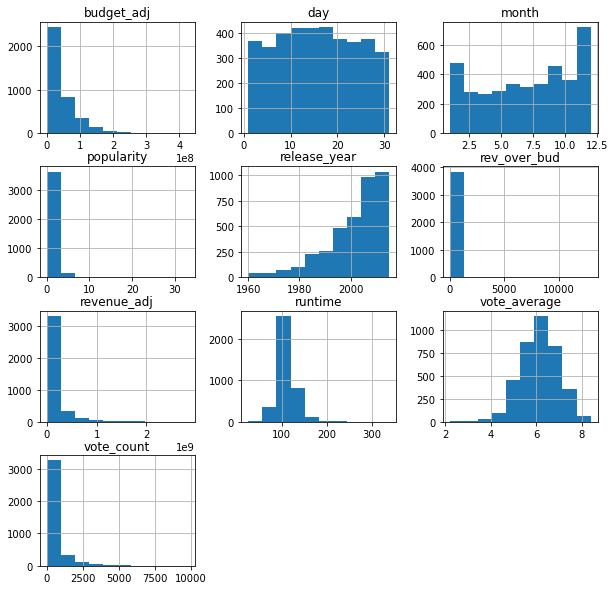

In [29]:
movies_clean.hist(figsize = (10, 10));

### Research Question 1 --  What can we infer about profitability?

In [30]:
movies_clean['gross_adj'] = movies_clean.revenue_adj-movies_clean.budget_adj

In [31]:
movies_clean.gross_adj.describe()

count    3.832000e+03
mean     9.329368e+07
std      1.944954e+08
min     -4.139124e+08
25%     -1.637454e+06
50%      2.788427e+07
75%      1.079638e+08
max      2.750137e+09
Name: gross_adj, dtype: float64

Let's define a function to pull the highest and lowest attribute from the dataframe.  We'll make it generalized so it isn't dependant on the datafame.

In [32]:
def max_min(df,col):
    '''
    calculate the max and min values of a given column.
    
    input: dataframe of interest, column of interest
    output: concatinated maximum and minumum rows for the dataframe[column]
    '''
    mi = df[df[col] == df[col].min()]
    mx = df[df[col] == df[col].max()]
    
    return pd.concat([mx,mi])

We try it out on the gross adjusted profit.  Star Wars grossed a lot of money.  The Warrior's Way clearly did not.

In [33]:
max_min(movies_clean,'gross_adj')

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,...,genres_3,genres_4,genres_5,prod_comp_1,prod_comp_2,prod_comp_3,prod_comp_4,prod_comp_5,rev_over_bud,gross_adj
1329,12.037933,Star Wars,George Lucas,121,3/20/77,4428,7.9,1977,39575591,2789712242,...,Science Fiction,None,None,Lucasfilm,Twentieth Century Fox Film Corporation,None,None,None,70.490729,2750136651
2244,0.250540,The Warrior's Way,Sngmoo Lee,100,12/2/10,74,6.4,2010,425000000,11087569,...,Action,Western,Thriller,Boram Entertainment Inc.,None,None,None,None,0.026088,-413912431


Next let's investigate the <b>popularity</b> of the movie.  More information on the calculation of the popularity attribute can be found <a href='https://developers.themoviedb.org/3/getting-started/popularity'>here</a>.

In [34]:
movies_clean.describe()['popularity']

count    3832.000000
mean        1.195952
std         1.478069
min         0.001117
25%         0.464070
50%         0.802644
75%         1.377889
max        32.985763
Name: popularity, dtype: float64

In [35]:
max_min(movies_clean,'popularity')

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,...,genres_3,genres_4,genres_5,prod_comp_1,prod_comp_2,prod_comp_3,prod_comp_4,prod_comp_5,rev_over_bud,gross_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015,137999939,1392445892,...,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu,10.090192,1254445953
7268,0.001117,Born into Brothels,Zana Briski|Ross Kauffman,85,12/8/04,23,6.4,2004,404055,4057946,...,None,None,None,NaN,NaN,NaN,NaN,NaN,10.043054,3653891


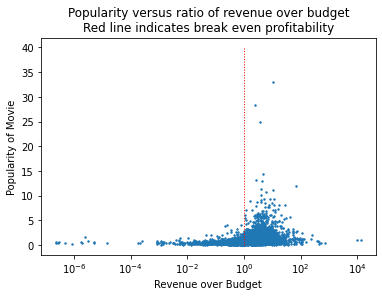

In [36]:
movies_clean.plot.scatter(x='rev_over_bud',y='popularity',logx=True,s=2)
plt.xlabel('Revenue over Budget')
plt.ylabel('Popularity of Movie')
plt.title('Popularity versus ratio of revenue over budget\nRed line indicates break even profitability')
plt.plot([1,1],[0,40],c='r',linestyle=':',linewidth=1)

In [37]:
max_min(movies_clean,'rev_over_bud')

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,...,genres_3,genres_4,genres_5,prod_comp_1,prod_comp_2,prod_comp_3,prod_comp_4,prod_comp_5,rev_over_bud,gross_adj
7447,1.120442,Paranormal Activity,Oren Peli,86,9/14/07,714,6.1,2007,15775,203346220,...,None,None,None,Blumhouse Productions,Solana Films,None,None,None,1.289041e+04,203330445
8142,0.552091,Mallrats,Kevin Smith,94,10/20/95,201,6.8,1995,8585801,2,...,None,None,None,Gramercy Pictures,Alphaville Films,View Askew Productions,None,None,2.329427e-07,-8585799


In [38]:
max_min(movies_clean,'popularity')

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,...,genres_3,genres_4,genres_5,prod_comp_1,prod_comp_2,prod_comp_3,prod_comp_4,prod_comp_5,rev_over_bud,gross_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015,137999939,1392445892,...,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu,10.090192,1254445953
7268,0.001117,Born into Brothels,Zana Briski|Ross Kauffman,85,12/8/04,23,6.4,2004,404055,4057946,...,None,None,None,NaN,NaN,NaN,NaN,NaN,10.043054,3653891


So popularity doesn't seem to strongly impact profitability.  Although movies that are highly popular tend to recover the cost of production.  Note in a logarithmic scale the most popular films cluster in a normal like distribution between break-even and 10:1 revenue to budget ratio.

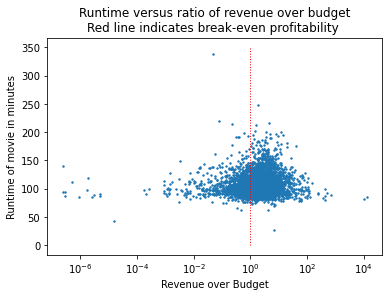

In [39]:
movies_clean.plot.scatter(x='rev_over_bud',y='runtime',s=2,logx=True)
plt.xlabel('Revenue over Budget')
plt.ylabel('Runtime of movie in minutes')
plt.title('Runtime versus ratio of revenue over budget\nRed line indicates break-even profitability ')
plt.plot([1,1],[0,350],c='r',linestyle=':',linewidth=1)

Let us break down the runtimes of movies above break-even (revenue equal to budget) and below the threshold.

In [40]:
movies_clean[movies_clean['rev_over_bud'] > 1].runtime.describe()

count    2760.000000
mean      110.218116
std        20.147055
min        26.000000
25%        96.000000
50%       106.000000
75%       121.000000
max       248.000000
Name: runtime, dtype: float64

In [41]:
movies_clean[movies_clean['rev_over_bud'] < 1].runtime.describe()

count    1069.000000
mean      106.789523
std        18.929834
min        42.000000
25%        95.000000
50%       104.000000
75%       115.000000
max       338.000000
Name: runtime, dtype: float64

Runtime does not seem to be an indicator of profitability.  Although movies that are a <b>little bit</b> longer seem to do better on average.

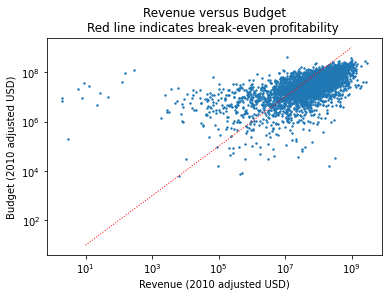

In [42]:
movies_clean.plot.scatter(x='revenue_adj',y='budget_adj',s=2,logx=True,logy=True)
plt.xlabel('Revenue (2010 adjusted USD)')
plt.ylabel('Budget (2010 adjusted USD)')
plt.title('Revenue versus Budget\nRed line indicates break-even profitability ')
plt.plot([10,10**9],[10,10**9],c='r',linestyle=':',linewidth=1)

So spending a lot of money on a film doesn't ensure profitability.  Although it would seem that 

In [43]:
genre_profits = movies_clean.groupby(['genres_1']).rev_over_bud.mean()
genre_profits

genres_1
Action              2.762023
Adventure           5.110429
Animation           3.486888
Comedy              5.472553
Crime               4.168493
Documentary        23.270968
Drama               4.586594
Family              5.408716
Fantasy             3.488393
History             5.026576
Horror             95.091969
Music               3.846192
Mystery             3.852591
Romance             4.476758
Science Fiction    12.448783
TV Movie            8.400001
Thriller            3.972756
War                 1.929661
Western             2.222265
Name: rev_over_bud, dtype: float64

Text(0.5, 1.0, 'Average profitability by genre')

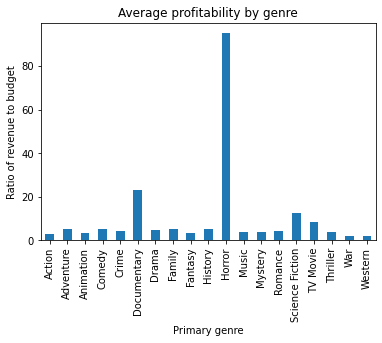

In [44]:
genre_profits.plot(kind='bar')
plt.xlabel('Primary genre')
plt.ylabel('Ratio of revenue to budget')
plt.title('Average profitability by genre')

Horror and documentary films have decent profitability.  Documentaries tend to have low budget costs.   

### Research Question 2 -- The dependance of profitability on date

Text(0.5, 1.0, 'Average profitability by year')

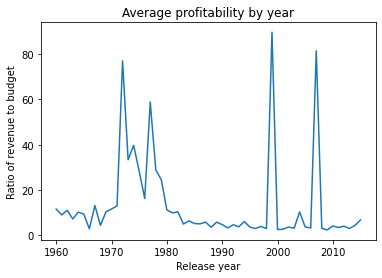

In [45]:
year_budget = movies_clean.groupby(['release_year']).rev_over_bud.mean()
year_budget.plot()
plt.xlabel('Release year')
plt.ylabel('Ratio of revenue to budget')
plt.title('Average profitability by year')

Between 1970-1980 there was a high average profitability, and again spikes in the 2000's.

In [46]:
movies_clean[movies_clean['rev_over_bud']>100]

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,...,genres_3,genres_4,genres_5,prod_comp_1,prod_comp_2,prod_comp_3,prod_comp_4,prod_comp_5,rev_over_bud,gross_adj
242,0.532205,The Gallows,Travis Cluff|Chris Lofing,87,7/10/15,247,5.0,2015,91999,39251239,...,None,None,None,New Line Cinema,Blumhouse Productions,Management 360,Tremendum Pictures,None,426.648540,39159240
1354,0.331417,Eraserhead,David Lynch,89,3/19/77,194,7.1,1977,35977,25184467,...,Horror,Drama,None,American Film Institute (AFI),Libra Films,None,None,None,700.015760,25148490
1372,0.137351,The Hills Have Eyes,Wes Craven,89,7/22/77,57,6.0,1977,827489,89944525,...,None,None,None,Blood Relations Co.,None,None,None,None,108.695735,89117036
2207,0.346071,Catfish,Henry Joost|Ariel Schulman,87,9/17/10,125,6.4,2010,30000,3045943,...,None,None,None,Hit the Ground Running Films,None,None,None,None,101.531433,3015943
2449,0.934621,The Blair Witch Project,Daniel Myrick|Eduardo SÃ¡nchez,81,7/14/99,522,6.3,1999,32726,324645105,...,None,None,None,Artisan Entertainment,Haxan Films,None,None,None,9920.097323,324612379
4192,1.297355,Clerks,Kevin Smith,92,9/13/94,383,7.2,1994,39720,4635663,...,None,None,None,Miramax Films,View Askew Productions,None,None,None,116.708535,4595943
4560,0.491648,The Devil Inside,William Brent Bell,83,1/6/12,162,4.5,2012,949744,96644543,...,None,None,None,Room 101,Prototype,None,None,None,101.758519,95694799
6284,0.733587,Keeping Mum,Niall Johnson,103,12/2/05,73,6.5,2005,188699,20728664,...,None,None,None,Summit Entertainment,None,None,None,None,109.850418,20539965
6821,0.206454,Facing the Giants,Alex Kendrick,111,9/29/06,41,6.8,2006,108166,11009586,...,None,None,None,Destination Films,None,None,None,None,101.784165,10901420
7057,0.762134,Open Water,Chris Kentis,79,8/6/04,171,5.3,2004,150077,63111168,...,None,None,None,Plunge Pictures LLC,None,None,None,None,420.525250,62961091


Indeed, there is a preponderance of horror films in the high revenue to budget ratio cohort.

Text(0.5, 1.0, 'Average profitability by release month')

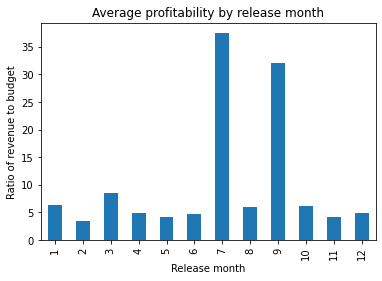

In [47]:
year_budget = movies_clean.groupby(['month']).rev_over_bud.mean()
year_budget.plot(kind='bar')
plt.xlabel('Release month')
plt.ylabel('Ratio of revenue to budget')
plt.title('Average profitability by release month')

Summer movie releases, as expected, are highly profitable. The data bears this out.

<a id='conclusions'></a>
## Conclusions


What we have learned is that profitability is not ensured by long run times or popularity of the film.  Horror films have a high average profitability.  Summer movies releases also have had a high average profitability.  

Summer released horror movies have had good past performance based on profitability, but this does not ensure a profitabile film.